<a href="https://colab.research.google.com/github/ttobaegi/ML_Python/blob/master/EDA_BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 구글 Colab 서버 세팅

In [2]:
print('===== OS =====')
!cat /etc/issue.net

print('===== CPU =====')
!cat /proc/cpuinfo

print('===== Memory =====')
!cat /proc/meminfo

print('===== Disk =====')
!df -h

print('===== GPU =====')
!nvidia-smi

===== OS =====
Ubuntu 18.04.5 LTS
===== CPU =====
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physic

### 데이터 설명

###### 2008~2013년에 수집한 데이터를 통해 포루투갈 은행의 텔레마케팅 데이터를 150개 피처의 데이터를 수집 
######2012년 7월 이전까지의 데이터로 22개의 피처로 데이터 모델링


Output variable (desired target):y
#### Has the client subscribed a term deposit?
고객의 정기예금 신청 여부 확인


library  설정

In [5]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')         # Suppress Depreciation and Incorrect Usage Warnings

## 나눔고딕 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

# 한글 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 폰트 설정 세팅
matplotlib.front_manager._rebuild()
matplotlib.rc('font', family = 'NanumGothic')
# 나눔고딕 폰트 그래프내 깨지는 경우 대비
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

AttributeError: ignored

In [3]:
# 데이터 불러오기 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### EDA

In [22]:
df = pd.read_csv('/content/drive/MyDrive/ML_BankMarketing/bank.csv', sep=';')
df.shape

(4521, 17)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
df=df.rename(columns={'y':'deposit'}) #예측변수 y > deposit으로 rename

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7744652610>,
      dtype=object)

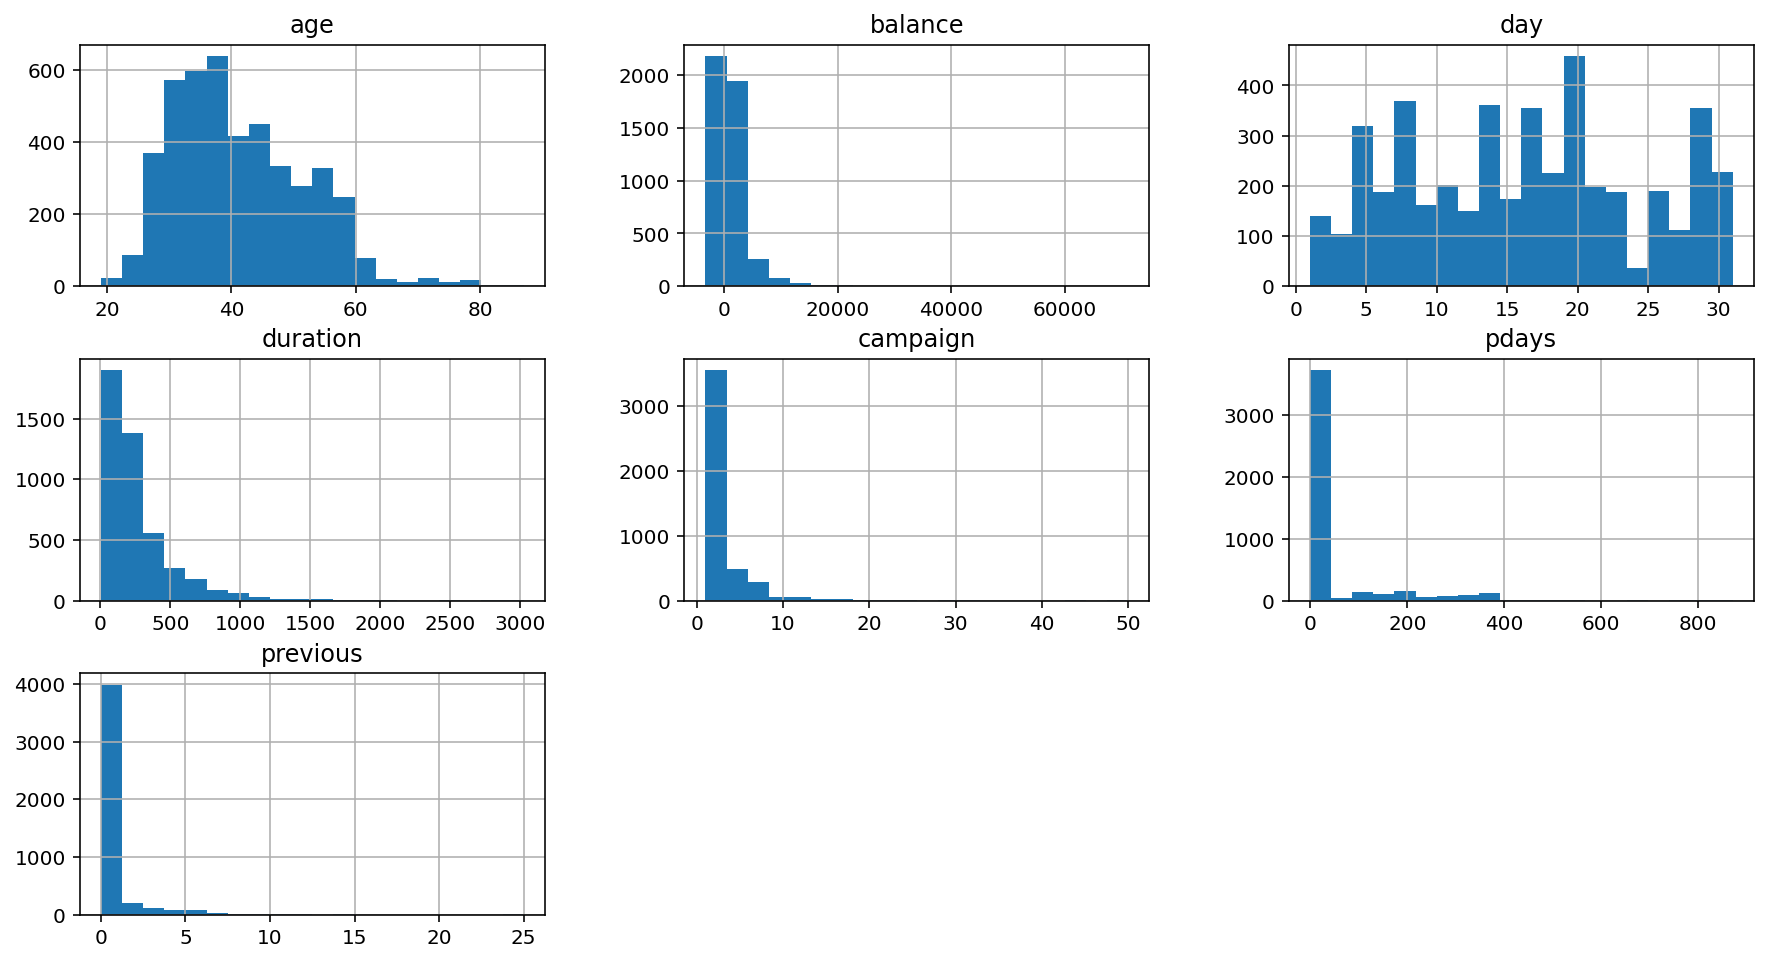

In [24]:
df.hist(figsize=(15,8), bins=20)

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

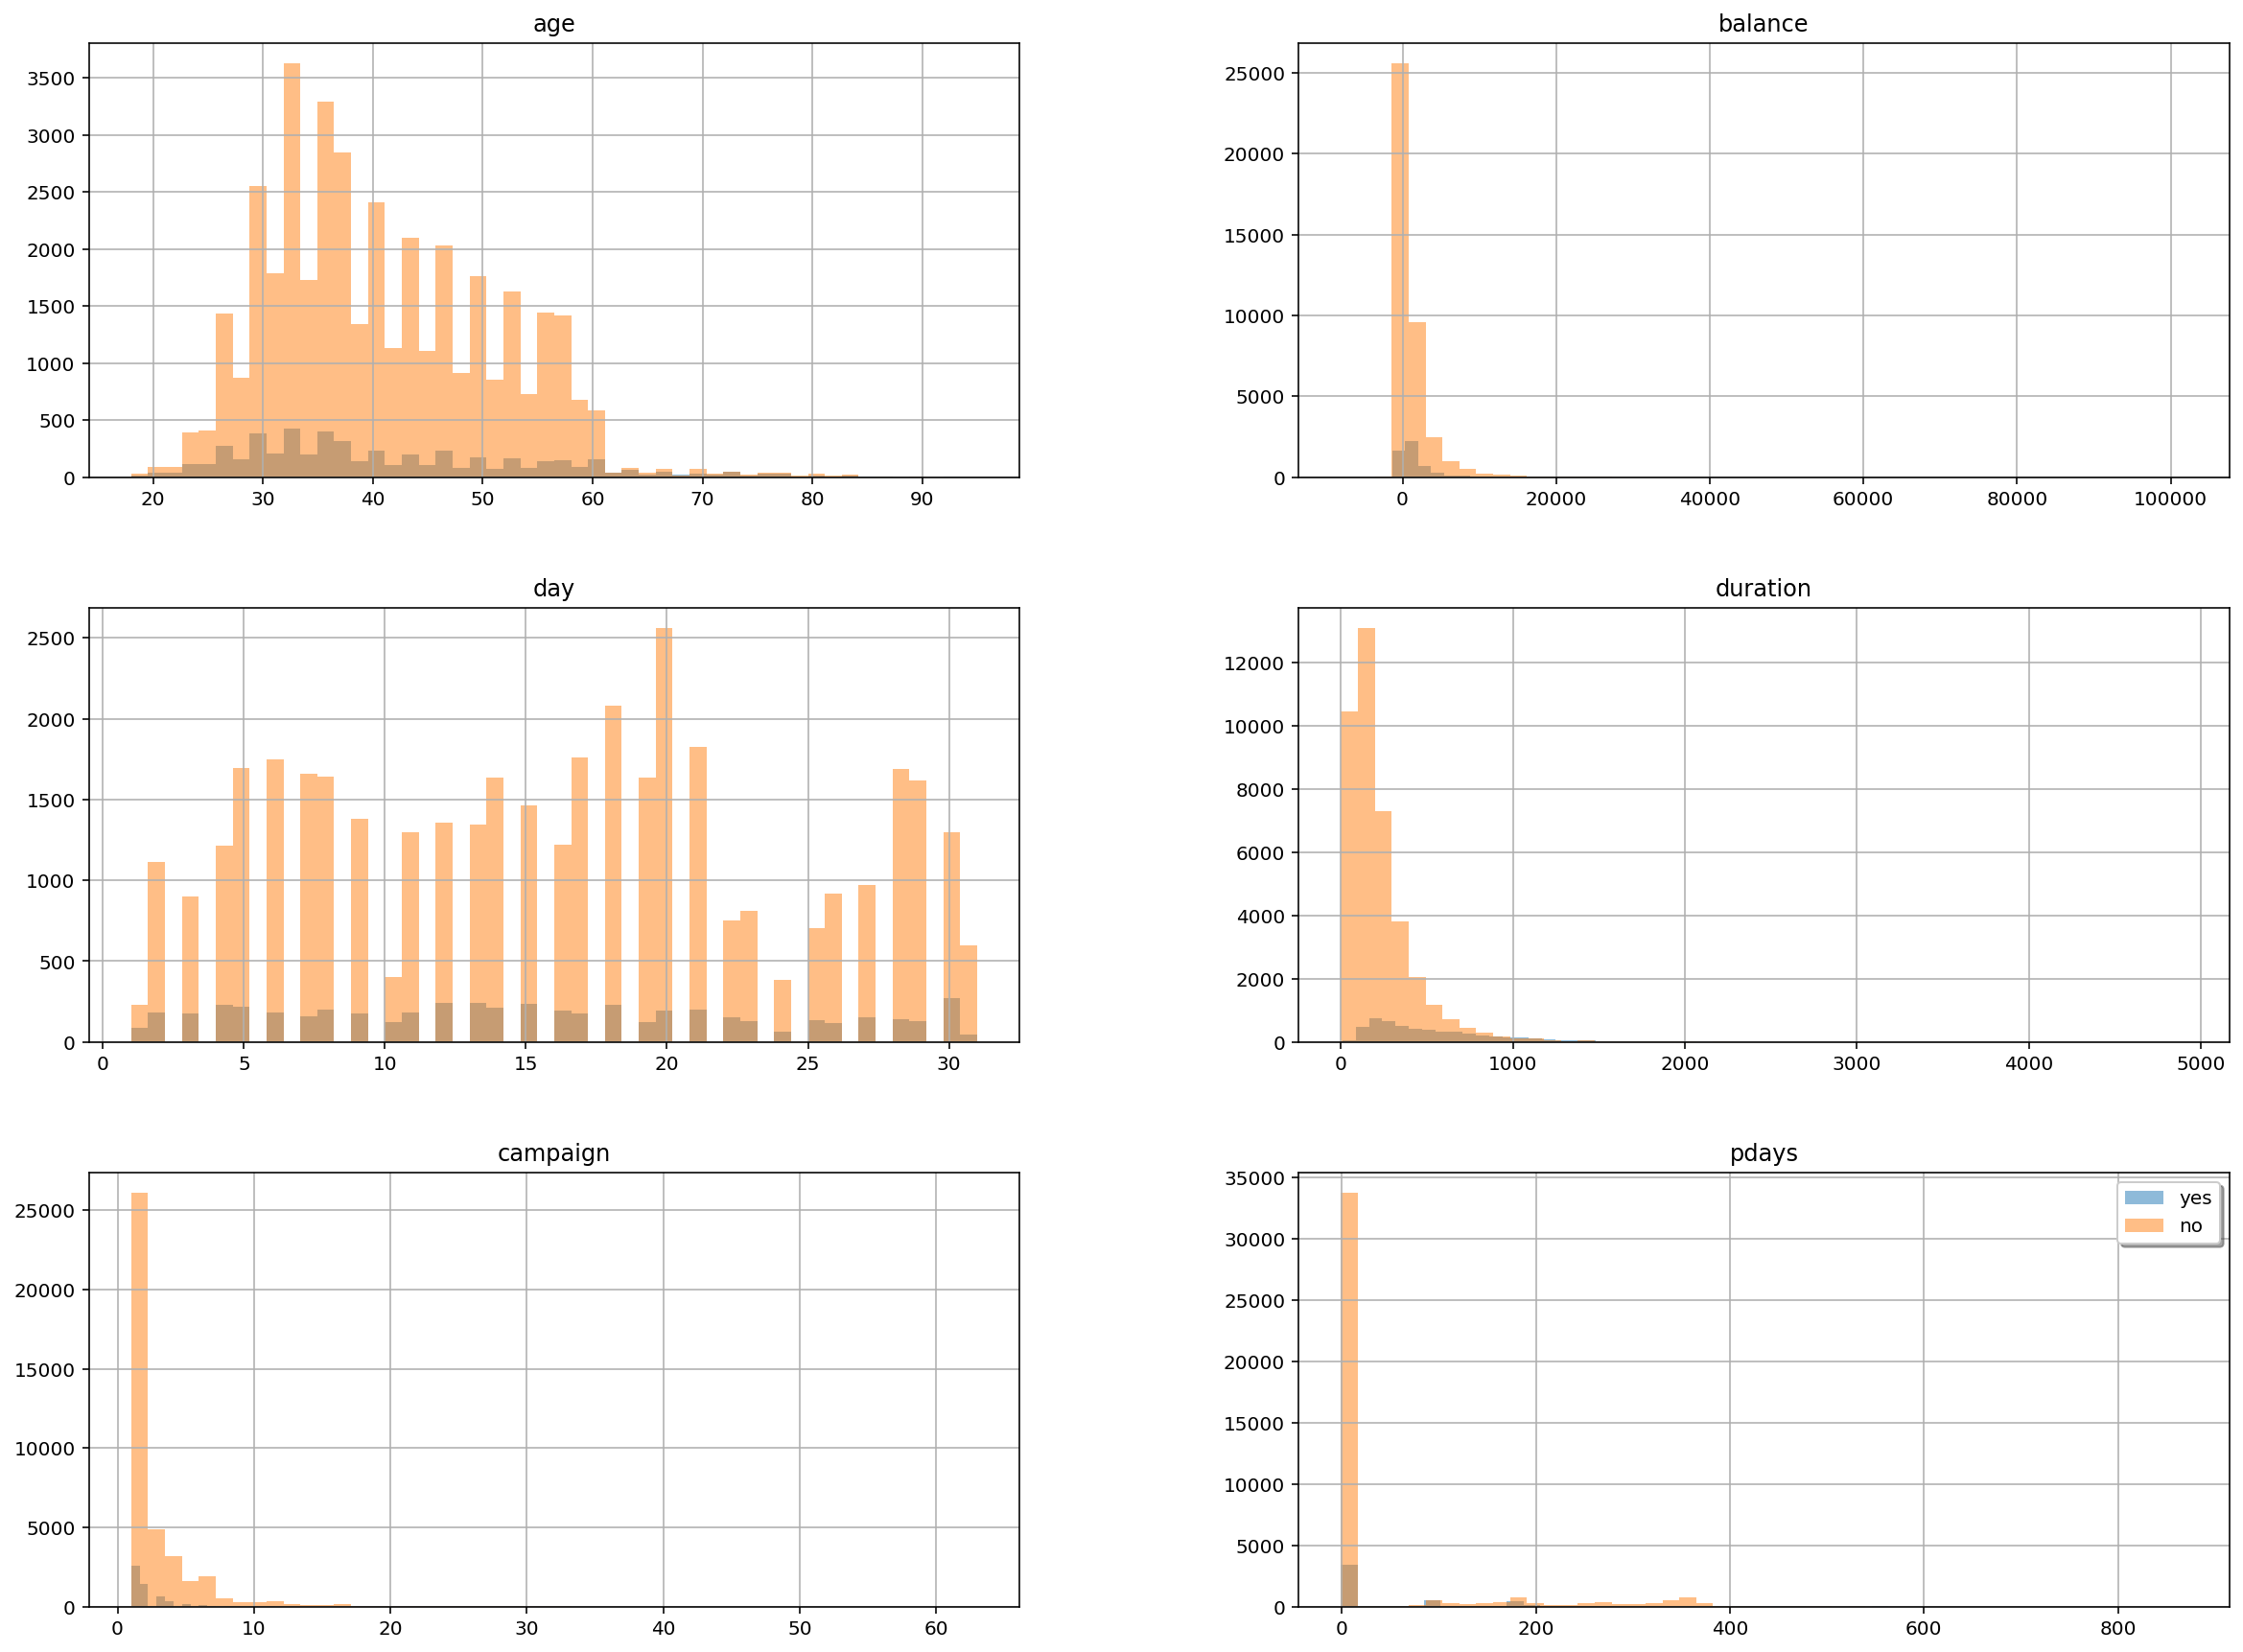

In [19]:
fix, ax = plt.subplots(3,2, figsize=(20,15))
h=df.loc[df['deposit']=='yes', num_cols[:6]].hist(alpha=0.5, bins=50, ax=ax)
h=df.loc[df['deposit']=='no', num_cols[:6]].hist(alpha=0.5, bins=50, ax=ax)
plt.legend(['yes','no'],shadow=True)